<a href="https://colab.research.google.com/github/khojwar/Master_Thesis/blob/main/003_(first_success)_pos_tagging_using_word2Vec_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task success Till now are :
Step 1:
1. retrieve tags from directrie's files and store in "tags" list
2. plots bar diagram for tags
  *   One axis represents tags
  *   Other axis represents counts

Step 2: Extract the words and keys from directries xml files

Step 3: Preprocessing and Dataset Preparation

Step 4: Load pre-trained word embeddings (using Word2Vec)

Step 5: build an LSTM model using Keras

step 6: Step 6: POS Tagging with the LSTM Model


# Problems seen after train the model
1. only deal with seen data. Gives error when dealing with unseen input sequence of words
2. user input दिदा "बाट", "को", "का", "लाई" etc शब्द लाई छुटाइ दिन पर्छ ।
3. can't deal with confilct words

# Step 1:

In [1]:
import os
import xml.etree.ElementTree as ET    #It allows to create, modify, and extract information from XML documents using a simple and intuitive API.
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

In [2]:
# authenticate and mount the Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Chage directory to project folder
%cd /content/drive/MyDrive/Nepali POS Tagging/
%ls

/content/drive/MyDrive/Nepali POS Tagging
 002_Nepali_pos_tagging_SVM.ipynb          nnc_updated_ah/
'005 pos tagging .ipynb'                   support.txt
'C:\Windows\System32\cmd.exe\output.txt'   word_pos_tag.txt


In [4]:
import os
import xml.etree.ElementTree as ET    #It allows to create, modify, and extract information from XML documents using a simple and intuitive API.


path = 'nnc_updated_ah/gc/books/'
filelist = os.listdir(path)

tags = []

for file in filelist:
    filepath = os.path.join(path, file)

    tree = ET.parse(filepath)
    root = tree.getroot()

    for data in root.findall("text"):     # used in Python in combination with regular expressions (regex) to extract all occurrences of a particular pattern in a given string("text").
        for value in data:

            for div in value.findall("div"):
                for subdiv in div:

                    for sentence in subdiv.findall("s"):
                        # print(sentence.attrib)
                        for s in sentence:
                            # print(s.tag)
                            # print(s.attrib)
                            # print(s.attrib['ctag'])
                            tags.append(s.attrib['ctag'])
                            # print(f"{s.text}/{s.attrib['ctag']}", '', end=''),
                        # print('\n')


# Create a bar plot using matplotlib

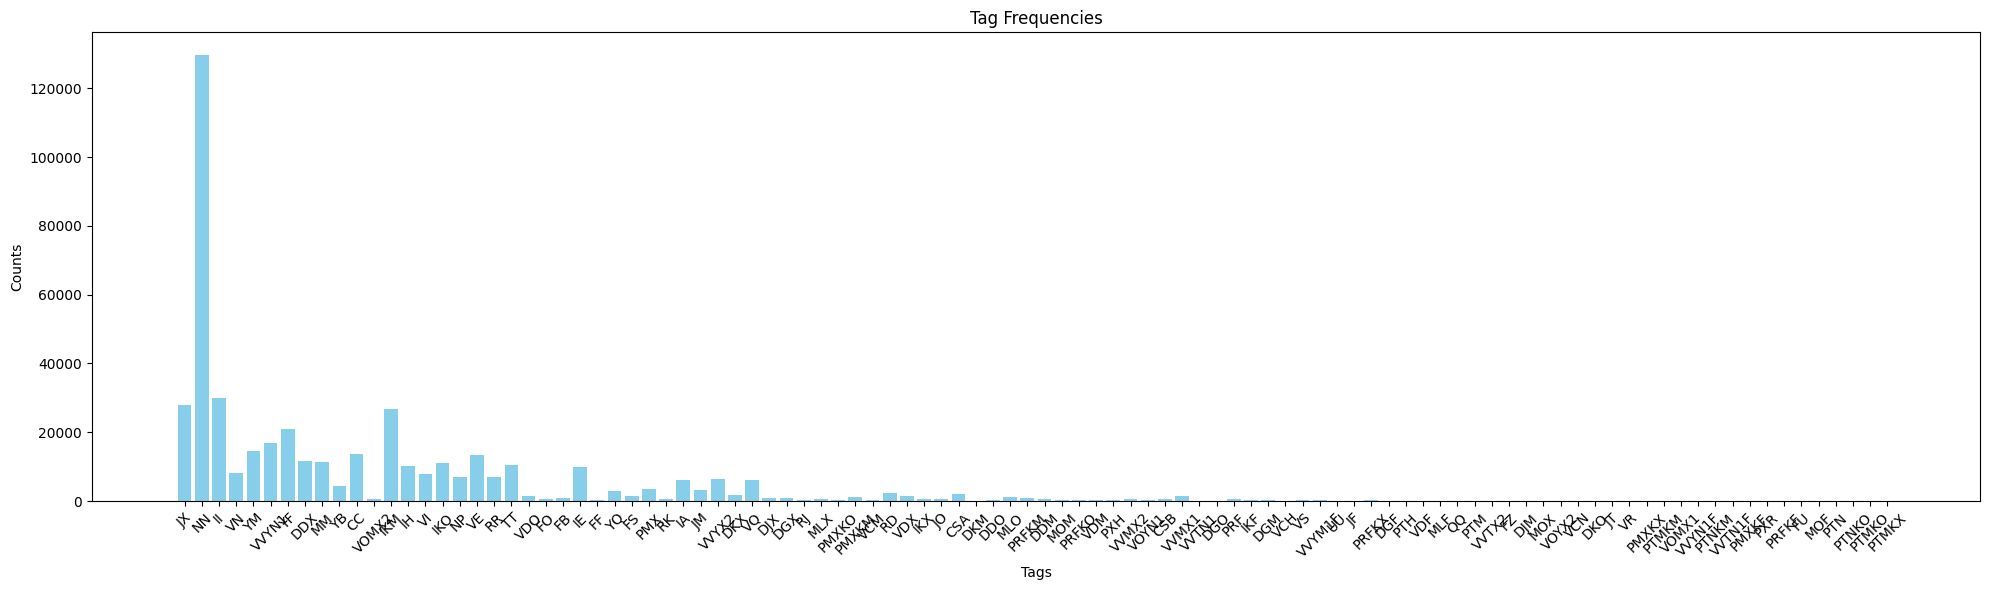

In [5]:
# Count the occurrences of each tag
tag_counts = Counter(tags)

# Extract the tags and their corresponding counts
unique_tags = list(tag_counts.keys())
counts = list(tag_counts.values())

# Create a bar plot
plt.figure(figsize=(20, 6))
plt.bar(unique_tags, counts, color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.title('Tag Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


# Create a horizontal bar plot using matplotlib

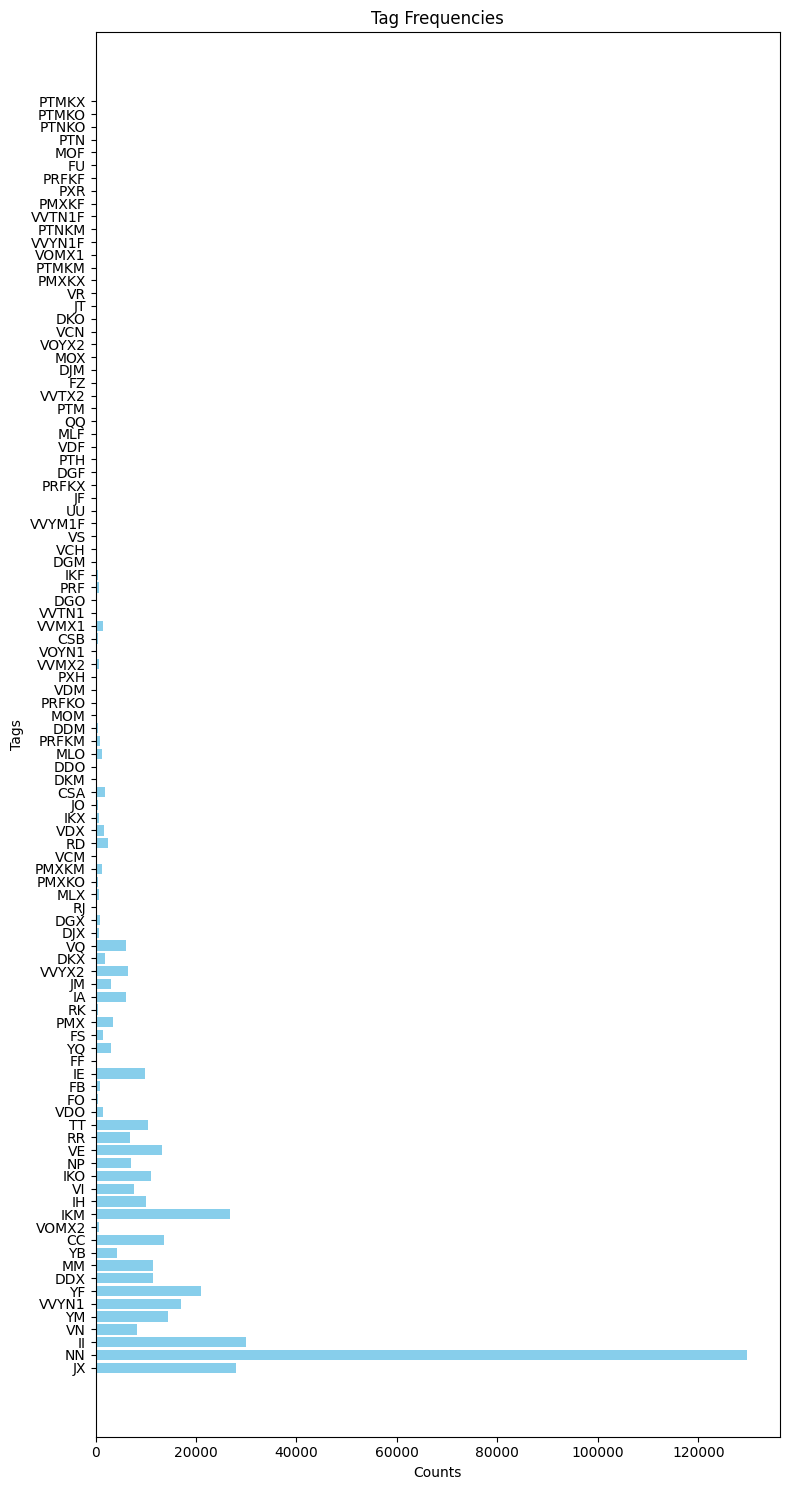

In [6]:
# Count the occurrences of each tag
tag_counts = Counter(tags)

# Extract the tags and their corresponding counts
unique_tags = list(tag_counts.keys())
counts = list(tag_counts.values())

# Create a horizontal bar plot
plt.figure(figsize=(8, 15))
plt.barh(unique_tags, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Tags')
plt.title('Tag Frequencies')
plt.tight_layout()

# Display the plot
plt.show()


# Create a bar plot using Seaborn

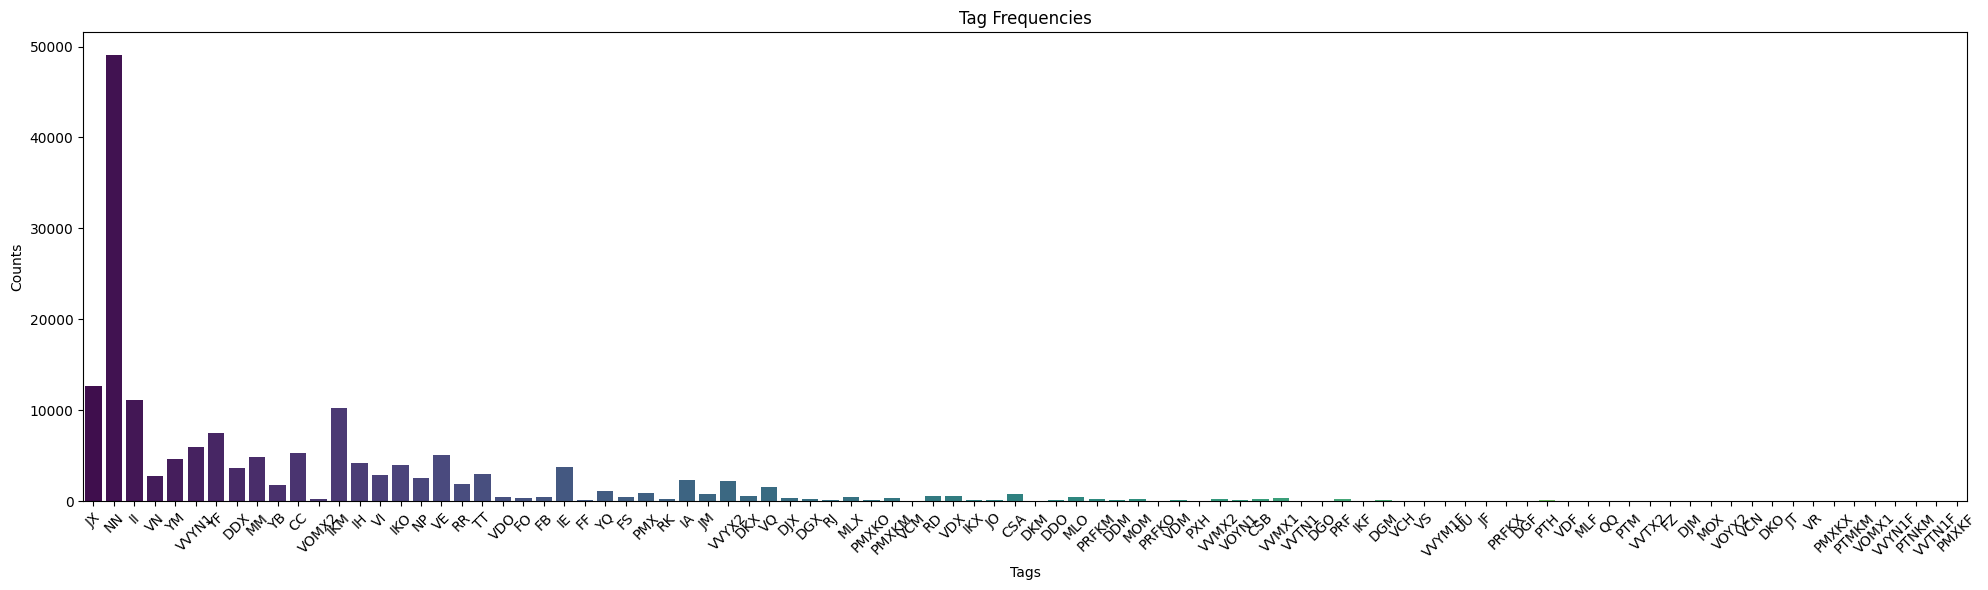

In [5]:
# Count the occurrences of each tag
tag_counts = Counter(tags)

# Convert the tag_counts to a DataFrame for Seaborn plotting
tag_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['Count']).reset_index()
tag_df.rename(columns={'index': 'Tag'}, inplace=True)

# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(x='Tag', y='Count', data=tag_df, palette='viridis')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.title('Tag Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


# Create a horizontal bar plot using Seaborn

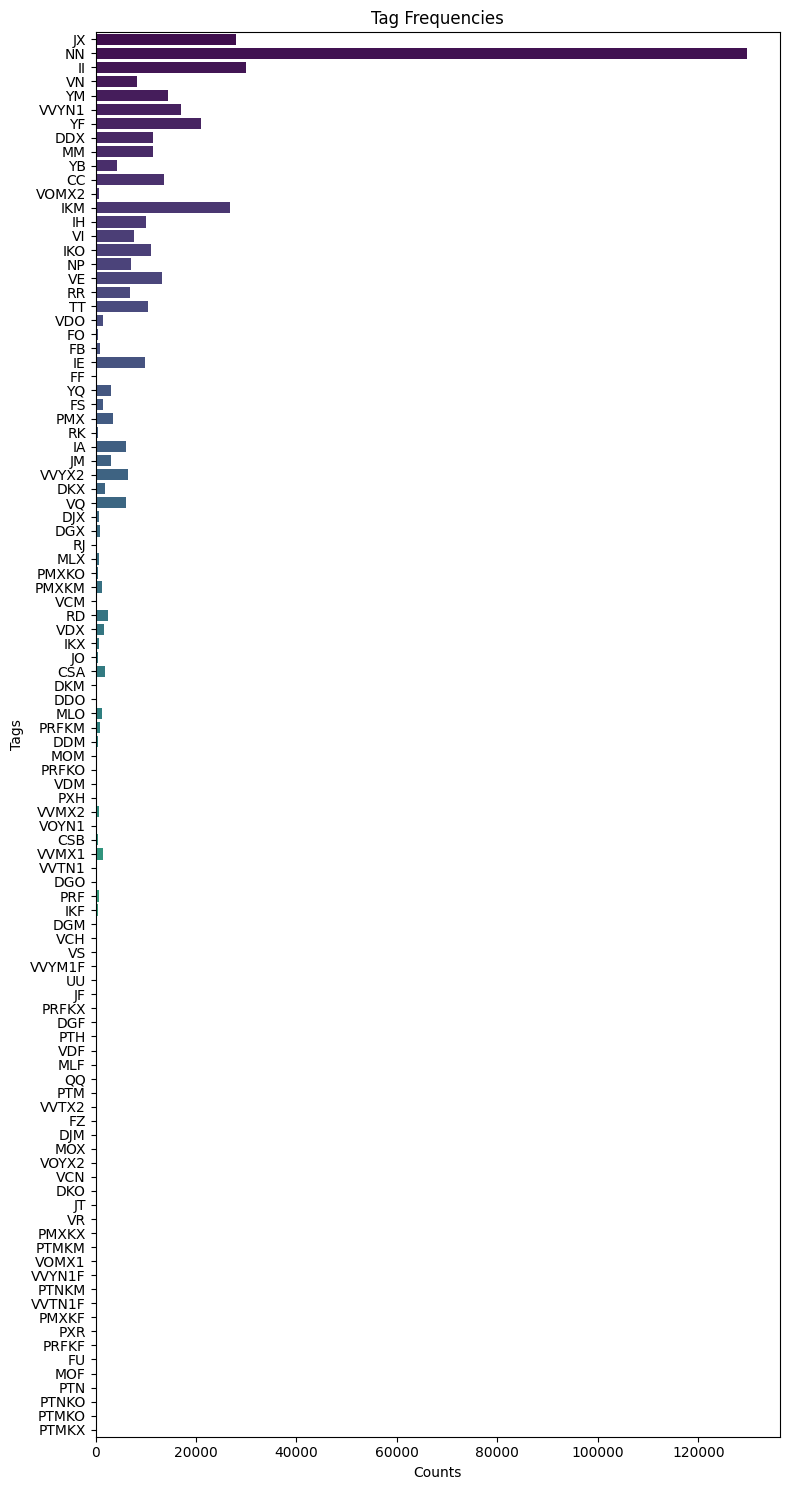

In [8]:
# Count the occurrences of each tag
tag_counts = Counter(tags)

# Convert the tag_counts to a DataFrame for Seaborn plotting
tag_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['Count']).reset_index()
tag_df.rename(columns={'index': 'Tag'}, inplace=True)

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(8, 15))
sns.barplot(x='Count', y='Tag', data=tag_df, palette='viridis')
plt.xlabel('Counts')
plt.ylabel('Tags')
plt.title('Tag Frequencies')
plt.tight_layout()

# Display the plot
plt.show()


# Same above task with different code

In [6]:
# Set the path to the directory containing XML files
path = 'nnc_updated_ah/gc/books/'
filelist = os.listdir(path)
filelist

['book-academic-rupantaran-2062.xml', 'book-academic-jana-siksha-2058.xml']

In [7]:
tagsets = []

for file in filelist:
    filepath = os.path.join(path, file)
    # print(filepath)

    tree = ET.parse(filepath)   # Parse an XML file and create an ElementTree object
    root = tree.getroot()   # Get the root element of the XML document
    # print(root)

    # Find all "w" elements with a "ctag" attribute
    word_elements = root.findall(".//w[@ctag]")

    # Extract POS tags
    tagset = [word.attrib["ctag"] for word in word_elements]
    tagsets.extend(tagset)



# plot the code

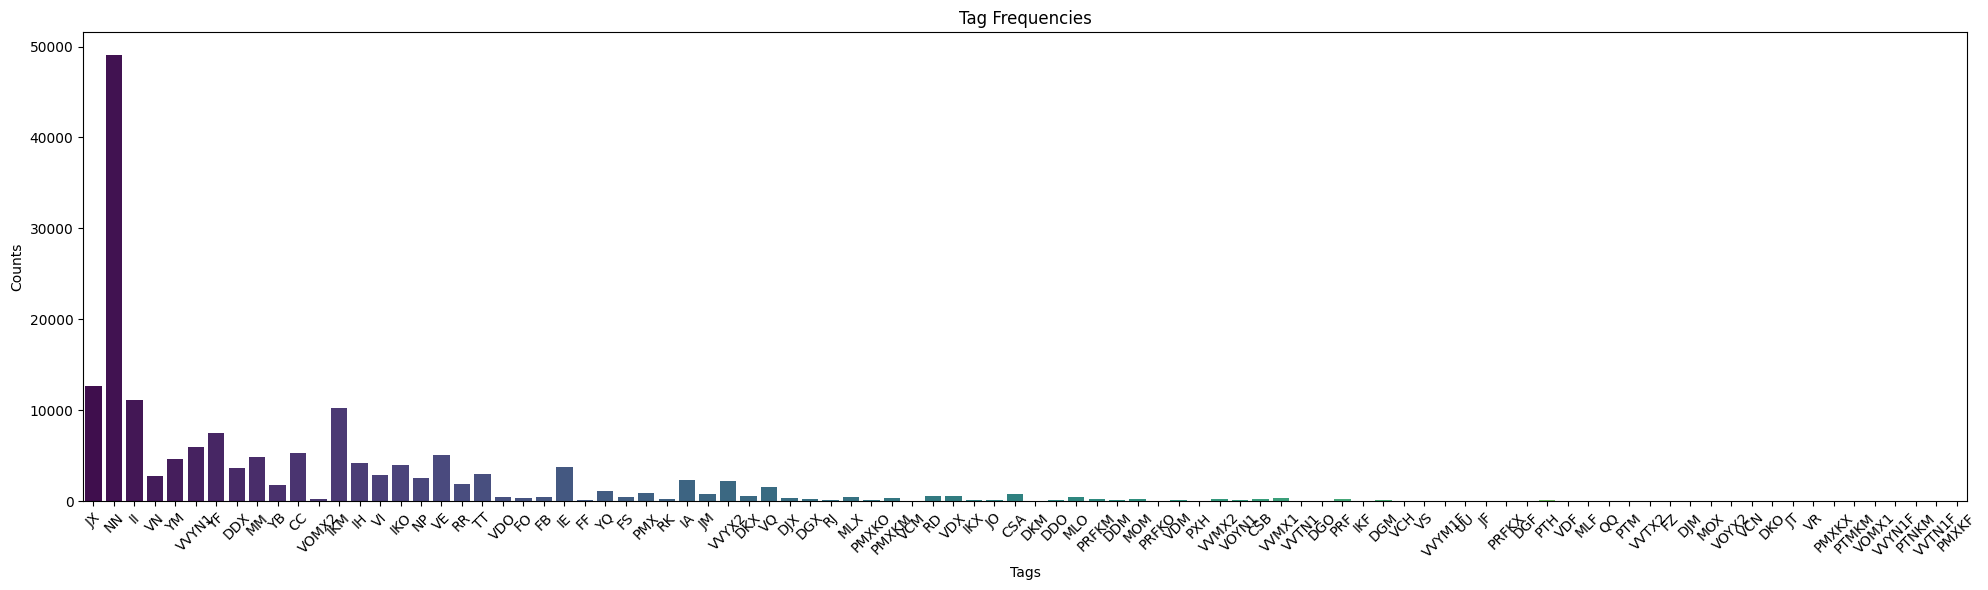

In [8]:
# Count the occurrences of each tag
tag_counts = Counter(tagsets)

# Convert the tag_counts to a DataFrame for Seaborn plotting
tag_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['Count']).reset_index()
tag_df.rename(columns={'index': 'Tag'}, inplace=True)

# Create a bar plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(x='Tag', y='Count', data=tag_df, palette='viridis')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.title('Tag Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Step 2: Extract the words and keys from directries xml files

In [9]:
all_custom_dataset = []

for file in filelist:
    filepath = os.path.join(path, file)
    # print(filepath)

    tree = ET.parse(filepath)   # Parse an XML file and create an ElementTree object
    # Get the root element of the XML document
    root = tree.getroot()
    # print(root)

    # Find all "w" elements with a "ctag" attribute
    word_elements = root.findall(".//w[@ctag]")

    # Extract words and corresponding POS tags
    custom_dataset = [(word.text, word.attrib["ctag"]) for word in word_elements]
    # custom_dataset = [file]
    all_custom_dataset.extend(custom_dataset)

    # Print the formatted custom dataset
    # print("custom_dataset =", custom_dataset)

# print("hello")
# print(all_custom_dataset)
# print(custom_dataset[:10])

In [10]:
print(len(all_custom_dataset))
print(all_custom_dataset[:10])

164263
[('रूपान्तरणः', 'JX'), ('समाज', 'NN'), ('अध्ययन', 'NN'), ('नेपाली', 'JX'), ('भाषा', 'NN'), ('मा', 'II'), ('प्रकाशित', 'JX'), ('हुने', 'VN'), ('अर्ध', 'JX'), ('–', 'YM')]


In [11]:
# # Choose a file path
# file_path = "/content/drive/MyDrive/Nepali POS Tagging/word_pos_tag.txt"

# # Write data to the file
# with open(file_path, "w") as file:
#     for word, pos_tag in zip(*all_custom_dataset):
#         line = f"{word}\t{pos_tag}\n"
#         file.write(line)

# print("Data saved successfully.")


#Step 3: Preprocessing and Dataset Preparation

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
words, pos_tags = zip(*all_custom_dataset)

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence, _ in all_custom_dataset]

# Create a vocabulary
vocab = set(word for sentence in tokenized_sentences for word in sentence)
vocab_size = len(vocab)

# Create a POS tag set
tag_set = set(pos_tags)

# Create word-to-index and tag-to-index mappings
word_to_index = {word: idx for idx, word in enumerate(vocab)}
tag_to_index = {tag: idx for idx, tag in enumerate(tag_set)}

# Convert words and tags to indices
word_indices = [[word_to_index[word] for word in sentence] for sentence in tokenized_sentences]
tag_indices = [tag_to_index[tag] for tag in pos_tags]


In [15]:
# Create a new "new_word_indices" with modified inner lists.   "word_indices" has both type of Shape (2,) and (1,). so, converting to (1,) shape as "new_word_indices".
new_word_indices = [[item[0]] if len(item) > 1 else item for item in word_indices]

In [16]:
new_word_indices[190:200]

[[7066],
 [8385],
 [7066],
 [10140],
 [8610],
 [9165],
 [8551],
 [3346],
 [5133],
 [14306]]

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Convert to lists of lists
new_word_indices = [[idx] for idx in new_word_indices]
tag_indices = [[idx] for idx in tag_indices]

# Pad sequences to a uniform length
max_sequence_length = max(len(seq) for seq in new_word_indices)
padded_word_indices = pad_sequences(new_word_indices, maxlen=max_sequence_length, padding='post')
padded_tag_indices = pad_sequences(tag_indices, maxlen=max_sequence_length, padding='post')

In [18]:
# # Train-Test split
# train_size = int(0.8 * len(tagged_sentences))
# train_set = tagged_sentences[:train_size]
# test_set = ttagged_sentences[train_size:]

# Step 4: Word Embeddings
Use pre-trained word embeddings to represent words as dense vectors. You can use pre-trained embeddings like Word2Vec or GloVe.

In [19]:
import numpy as np

# Load pre-trained word embeddings (example using Word2Vec)
from gensim.models import Word2Vec
embedding_model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, sg=1)

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, 100))  # Assuming embedding size is 100
for word, idx in word_to_index.items():
    if word in embedding_model.wv:  # Check if word is in the vocabulary
        embedding_matrix[idx] = embedding_model.wv[word]


# Step 5: LSTM Model
Now, let's build an LSTM model using Keras.

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=None))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(len(tag_set), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(np.array(new_word_indices), np.array(tag_indices), epochs=2, batch_size=1)


Epoch 1/2
164263/164263 [==============================] - 4599s 28ms/step - loss: 0.3089 - accuracy: 0.9311
Epoch 2/2
164263/164263 [==============================] - 4351s 26ms/step - loss: 0.0902 - accuracy: 0.9796


# Step 6: POS Tagging with the LSTM Model
You can now use the trained LSTM model for POS tagging new sentences:

In [24]:
new_sentence = "राम लेख लेख ।"
tokenized_new_sentence = word_tokenize(new_sentence.lower())
new_sentence_indices = [word_to_index[word] for word in tokenized_new_sentence]

predicted_tag_indices = model.predict(np.array([new_sentence_indices]))
predicted_tags = [list(tag_to_index.keys())[idx] for idx in np.argmax(predicted_tag_indices, axis=-1)[0]]

print(list(zip(tokenized_new_sentence, predicted_tags)))


1/1 [==============================] - 0s 38ms/step
[('राम', 'NP'), ('लेख', 'NN'), ('लेख', 'NN'), ('।', 'YF')]


In [25]:
# Save the entire model (architecture, weights, and optimizer)
model.save("/content/drive/MyDrive/Nepali POS Tagging/")

In [26]:
# Load the model back
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Nepali POS Tagging/")

In [52]:
new_sentence = "नेपाल बाट ४० बिजुली बंगलादेश लैजाने र भारत मा थप ५०० निर्यात को सम्झौता अन्तिम चरण मा पुगे को छ । ४० बिजुली भारत को बाटो हुँदै बंगलादेश लैजाने र व्यापार निगम सँग २०० र ३०० बिजुली निर्यात को सम्झौता अन्तिम चरण मा पुगे को नेपाल प्रमुख कार्यकारी निर्देशक जानकारी दिए ।"
tokenized_new_sentence = word_tokenize(new_sentence.lower())
new_sentence_indices = [word_to_index[word] for word in tokenized_new_sentence]

predicted_tag_indices = loaded_model.predict(np.array([new_sentence_indices]))
predicted_tags = [list(tag_to_index.keys())[idx] for idx in np.argmax(predicted_tag_indices, axis=-1)[0]]

print(list(zip(tokenized_new_sentence, predicted_tags)))

1/1 [==============================] - 1s 503ms/step
[('नेपाल', 'NP'), ('बाट', 'II'), ('४०', 'MM'), ('बिजुली', 'NN'), ('बंगलादेश', 'NP'), ('लैजाने', 'VN'), ('र', 'CC'), ('भारत', 'NP'), ('मा', 'II'), ('थप', 'JX'), ('५००', 'JX'), ('निर्यात', 'NN'), ('को', 'IKM'), ('सम्झौता', 'NN'), ('अन्तिम', 'JX'), ('चरण', 'NN'), ('मा', 'II'), ('पुगे', 'VE'), ('को', 'IKM'), ('छ', 'NN'), ('।', 'YF'), ('४०', 'MM'), ('बिजुली', 'NN'), ('भारत', 'NP'), ('को', 'IKM'), ('बाटो', 'NN'), ('हुँदै', 'VDX'), ('बंगलादेश', 'NP'), ('लैजाने', 'VN'), ('र', 'CC'), ('व्यापार', 'NN'), ('निगम', 'NN'), ('सँग', 'II'), ('२००', 'NN'), ('र', 'CC'), ('३००', 'MM'), ('बिजुली', 'NN'), ('निर्यात', 'NN'), ('को', 'IKM'), ('सम्झौता', 'NN'), ('अन्तिम', 'NN'), ('चरण', 'NN'), ('मा', 'II'), ('पुगे', 'VE'), ('को', 'IKM'), ('नेपाल', 'NP'), ('प्रमुख', 'JX'), ('कार्यकारी', 'JX'), ('निर्देशक', 'JX'), ('जानकारी', 'NN'), ('दिए', 'VE'), ('।', 'YF')]


# Try below code too to split dataset

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Assuming you have already processed your word_indices and tag_indices

# # Convert to lists of lists
# word_indices = [[idx] for idx in word_indices]
# tag_indices = [[idx] for idx in tag_indices]

# # Pad sequences to a uniform length
# max_sequence_length = max(len(seq) for seq in word_indices)
# padded_word_indices = pad_sequences(word_indices, maxlen=max_sequence_length, padding='post')
# padded_tag_indices = pad_sequences(tag_indices, maxlen=max_sequence_length, padding='post')

# # Split dataset into training and testing sets (80-20 ratio)
# X_train, X_test, y_train, y_test = train_test_split(padded_word_indices, padded_tag_indices, test_size=0.2, random_state=42)

# # Build the LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=max_sequence_length))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dense(len(tag_set), activation='softmax'))

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=1, validation_data=(X_test, y_test))

# # Rest of your code...
